In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

pd.set_option('display.max_rows',1500)
pd.set_option('display.max_columns', 500)

In [3]:
#area=pd.read_csv('../data/clean_files/area_FL.csv')
ben_cost=pd.read_csv('../data/raw_files/Benefits_Cost_Sharing_PUF.csv',low_memory=False, encoding ='latin1')

In [4]:
ben_cost[ben_cost['BenefitName']=='Emergency Room Services']
ben_cost.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182666 entries, 0 to 1182665
Data columns (total 24 columns):
BusinessYear           1182666 non-null int64
StateCode              1182666 non-null object
IssuerId               1182666 non-null int64
SourceName             1182666 non-null object
ImportDate             1182666 non-null object
StandardComponentId    1182666 non-null object
PlanId                 1182666 non-null object
BenefitName            1182666 non-null object
CopayInnTier1          917253 non-null object
CopayInnTier2          176973 non-null object
CopayOutofNet          917253 non-null object
CoinsInnTier1          917253 non-null object
CoinsInnTier2          176973 non-null object
CoinsOutofNet          917253 non-null object
IsEHB                  894774 non-null object
IsCovered              1135613 non-null object
QuantLimitOnSvc        299735 non-null object
LimitQty               166205 non-null float64
LimitUnit              166160 non-null object
Exclu

In [5]:

ben_cost=ben_cost.drop(['BusinessYear','SourceName', 'ImportDate'], axis = 1)
ben_cost=ben_cost[ben_cost.StateCode == 'FL'].copy()

ben=ben_cost.copy()
ben.drop(columns=['CopayInnTier1', 'CopayInnTier2', 'CopayOutofNet', 'CoinsInnTier1','CoinsInnTier2', 'CoinsOutofNet', 'IsEHB',
                'QuantLimitOnSvc', 'LimitQty', 'LimitUnit', 'Explanation','EHBVarReason', 'IsExclFromInnMOOP', 'IsExclFromOonMOOP'], axis=1, inplace=True)

dental = ['Basic Dental Care - Child', 'Orthodontia - Child', 'Major Dental Care - Child',
          'Basic Dental Care - Adult', 'Orthodontia - Adult', 'Major Dental Care - Adult',
          'Dental Check-Up for Children', 'Routine Dental Services (Adult)', 'Accidental Dental',
          'Dental Anesthesia','Congenital Anomaly, including Cleft Lip/Palate', 'Dental X-rays',
          'Topical Flouride', 'Sealants', 'Fillings', 'Recementation of Space Maintainers', 
          'Removal of Fixed Space Maintainers', 'Restorative Services', 
          'Periodontal Root Scaling and Planing', 'Periodontal Maintenance', 'Periodontal and Osseous Surgery',
          'Occlusal Adjustments', 'Root Canal Therapy and Retreatment', 'Periradicular Surgical Procedures',
          'Partial Pulpotomy', 'Vital Pulpotomy', 'Denture Adjustments',
          'Initial Placement of Bridges and Dentures', 'Tissue Conditioning', 'Reline and Rebase', 
          'Post and Core Build-up', 'Extractions', 'Complex Oral Surgery', 'Implants',
          'Immediate Dentures', 'Anesthesia Services for Dental Care', 'Accidental Dental Adult','Denture Reline and Rebase']

drugs = ['Off Label Prescription Drugs', 'Generic Drugs', 'Preferred Brand Drugs','Non-Preferred Brand Drugs','Specialty Drugs',
         'Tier 2 Generic Drugs', 'Preferred Generic Drugs']
ben=ben[ben['BenefitName'].isin(dental) == False]
ben=ben[ben['BenefitName'].isin(drugs) == False]
#[df[df["column"].isin(["value"]) == False]]
#ben.drop('StateCode', axis=1, inplace=True)

'''
add these if needed\\['IssuerId', 'StandardComponentId', 'PlanId', 'BenefitName',
'IsCovered','QuantLimitOnSvc', 'LimitQty', 'LimitUnit', 'Exclusions']
'StateCode','CopayInnTier1', 'CopayInnTier2', 'CopayOutofNet', 'CoinsInnTier1',
       'CoinsInnTier2', 'CoinsOutofNet', 'IsEHB',
       'QuantLimitOnSvc', 'LimitQty', 'LimitUnit', 'Explanation',
       'EHBVarReason', 'IsExclFromInnMOOP', 'IsExclFromOonMOOP'
'''

ben.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73779 entries, 58144 to 150911
Data columns (total 7 columns):
StateCode              73779 non-null object
IssuerId               73779 non-null int64
StandardComponentId    73779 non-null object
PlanId                 73779 non-null object
BenefitName            73779 non-null object
IsCovered              71816 non-null object
Exclusions             4479 non-null object
dtypes: int64(1), object(6)
memory usage: 4.5+ MB


In [6]:
ben.head()

,StateCode,IssuerId,StandardComponentId,PlanId,BenefitName,IsCovered,Exclusions
58144,FL,12379,12379FL0010001,12379FL0010001-02,Routine Eye Exam (Adult),Not Covered,NaN
58145,FL,12379,12379FL0010001,12379FL0010001-02,Urgent Care Centers or Facilities,Covered,NaN
58146,FL,12379,12379FL0010001,12379FL0010001-02,Home Health Care Services,Covered,NaN
58147,FL,12379,12379FL0010001,12379FL0010001-02,Emergency Room Services,Covered,NaN
58148,FL,12379,12379FL0010001,12379FL0010001-02,Emergency Transportation/Ambulance,Covered,NaN


# make DF for example table

In [7]:
ben_table = ben
ben_table.drop('Exclusions', axis=1, inplace=True)
ben_table = ben_table.iloc[:3]

ben_table

,StateCode,IssuerId,StandardComponentId,PlanId,BenefitName,IsCovered
58144,FL,12379,12379FL0010001,12379FL0010001-02,Routine Eye Exam (Adult),Not Covered
58145,FL,12379,12379FL0010001,12379FL0010001-02,Urgent Care Centers or Facilities,Covered
58146,FL,12379,12379FL0010001,12379FL0010001-02,Home Health Care Services,Covered


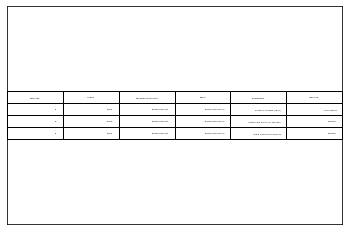

In [8]:


fig, ax = plt.subplots()

# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)

# Table from Ed Smith answer
clust_data = np.random.random((10,3))
collabel=("col 1", "col 2", "col 3")
ax.table(cellText=ben_table.values,colLabels=ben_table.columns,loc='center')



In [9]:
len(ben.BenefitName.unique())

72

# FL

In [10]:
ben_FL=ben[ben['StateCode']=='FL']

ben.drop('StateCode', axis=1, inplace=True)

In [13]:
cover_FL = ben_FL[ben_FL['IsCovered']== 'Covered']
not_cover_FL = ben[ben['IsCovered']== 'Not Covered']
cover_FL.head()

,StateCode,IssuerId,StandardComponentId,PlanId,BenefitName,IsCovered
58145,FL,12379,12379FL0010001,12379FL0010001-02,Urgent Care Centers or Facilities,Covered
58146,FL,12379,12379FL0010001,12379FL0010001-02,Home Health Care Services,Covered
58147,FL,12379,12379FL0010001,12379FL0010001-02,Emergency Room Services,Covered
58148,FL,12379,12379FL0010001,12379FL0010001-02,Emergency Transportation/Ambulance,Covered
58149,FL,12379,12379FL0010001,12379FL0010001-02,"Inpatient Hospital Services (e.g., Hospital Stay)",Covered


# FL covered

In [12]:
#cover_FL.BenefitName.unique()
#not_cover_FL.BenefitName.unique()
cover_FL.Exclusions.unique()
#cover_FL[cover_FL['BenefitName']=='Hyperbaric Oxygen Therapy']
#cover_FL.groupby(['IssuerId','PlanId']).count()

AttributeError: 'DataFrame' object has no attribute 'Exclusions'

In [ ]:
df1=cover_FL[['StandardComponentId','PlanId','BenefitName']]
#ben_dummies=pd.get_dummies(df1.BenefitName)
#df1=pd.concat([df1,ben_dummies], axis=1)
# df2=pd.pivot_table(df1, values ='BenefitName')

#pd.pivot_table(df1, values="value", index=["city"], columns="cuisine", fill_value=0)
df1['value']=1
table = pd.pivot_table(df1, values=['StandardComponentId'], index=['PlanId'],columns=['BenefitName'],aggfunc='count')
#table = pd.pivot_table(df1, values=['value'], index=['PlanId'],columns=['BenefitName'],fill_value=0)

#table.columns = table.columns.droplevel()
#table.to_csv('test.csv')
table.info()


# Covered Exclusions

In [ ]:
conditions = cover_FL[['PlanId','StandardComponentId','BenefitName', 'Exclusions']]
 #DataFrame.pivot(self, index=None, columns=None, values=None)[source]
conditions = conditions[conditions.Exclusions.notna()]
unies= conditions.drop_duplicates()
unies.sort_values('BenefitName')
#unies.BenefitName.unique()
#pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)
#conditionals=conditions.pivot(values='Exclusions',columns='BenefitName',index='PlanId')
#conditionals.info()

In [ ]:
conditional_covered =['Delivery and All Inpatient Services for Maternity Care','Diabetes Care Management','Mental/Behavioral Health Outpatient Services','Mental/Behavioral Health Inpatient Services','Substance Abuse Disorder Outpatient Services','Substance Abuse Disorder Inpatient Services','Durable Medical Equipment']
conditionals=unies.loc[unies['BenefitName'].isin(conditional_covered)]
conditionals.to_csv('../data/clean_files/covered_exclusions.csv')

In [ ]:
#flattened = pd.DataFrame(pivoted.to_records())
df3=pd.DataFrame(table.to_records())

old_names=df3.columns
old_names=old_names.drop(['PlanId'])
new_names=[x[1] for x in old_names]
old_names

In [ ]:
exclusions_dict = {'Delivery and All Inpatient Services for Maternity Care': ['Pre-certification/pre-authorization of coverage required for non-emergency admissions','Pre-certification/pre-authorization of coverage required for non-emergency admissions.',
                                                                         ' Cost sharing is a per day limit.'],
              'Diabetes Care Management':['Available at FHCP Pharmacy Only. Mail Order not available',
                                          'In order for services to be covered, diabetes outpatient self-management training and educational services must be provided under the direct supervision of an FHCP certified Diabetes Educator or board-certified Physician spcializing in endocrinology. Additionally, nutrition counseling must be provided by a licensed FHCP contracted dietitian.'],
              'Durable Medical Equipment':'Items that are primarily for convenience or comfort and items available over-the-counter are excluded. The replacement of equipment is also excluded, unless it is non-functional and not practically repairable.',
              'Mental/Behavioral Health Inpatient Services': 'Any inpatient Services provided in a residential treatment Facility are excluded from Coverage',
              'Mental/Behavioral Health Outpatient Services':'Any outpatient Services provided in a residential treatment Facility are excluded from Coverage',
              'Substance Abuse Disorder Inpatient Services':'Any inpatient Services provided in a residential treatment Facility are excluded from Coverage.',
              'Substance Abuse Disorder Outpatient Services':'Any outpatient Services provided in a residential treatment Facility are excluded from Coverage.'
             }


def make_exclusions(df):
    
    exclusions_dict = {'Delivery and All Inpatient Services for Maternity Care': [,
              'Diabetes Care Management':['Available at FHCP Pharmacy Only. Mail Order not available',
                                          'In order for services to be covered, diabetes outpatient self-management training and educational services must be provided under the direct supervision of an FHCP certified Diabetes Educator or board-certified Physician spcializing in endocrinology. Additionally, nutrition counseling must be provided by a licensed FHCP contracted dietitian.'],
              'Durable Medical Equipment':'Items that are primarily for convenience or comfort and items available over-the-counter are excluded. The replacement of equipment is also excluded, unless it is non-functional and not practically repairable.',
              'Mental/Behavioral Health Inpatient Services': 'Any inpatient Services provided in a residential treatment Facility are excluded from Coverage',
              'Mental/Behavioral Health Outpatient Services':'Any outpatient Services provided in a residential treatment Facility are excluded from Coverage',
              'Substance Abuse Disorder Inpatient Services':'Any inpatient Services provided in a residential treatment Facility are excluded from Coverage.',
              'Substance Abuse Disorder Outpatient Services':'Any outpatient Services provided in a residential treatment Facility are excluded from Coverage.'})
    
    temp_df=df[['BenefitName','Exclusions']]
    
                                                                                  
                                                                                  
    if temp_df['BenefitName'] == 'Delivery and All Inpatient Services for Maternity Care':
        if df['Exclusions'] == 'Pre-certification/pre-authorization of coverage required for non-emergency admissions':
            temp_df['']
                                                                                  
                                                                                  
   df.isin({'num_wings': [0, 3]})                                                                               
                                                                                  
                                                                                  
        
def label_race (row):
   if row['eri_hispanic'] == 1 :
      return 'Hispanic'
   if row['eri_afr_amer'] + row['eri_asian'] + row['eri_hawaiian'] + row['eri_nat_amer'] + row['eri_white'] > 1 :
      return 'Two Or More'
   if row['eri_nat_amer'] == 1 :
      return 'A/I AK Native'
   if row['eri_asian'] == 1:
      return 'Asian'
   if row['eri_afr_amer']  == 1:
      return 'Black/AA'
   if row['eri_hawaiian'] == 1:
      return 'Haw/Pac Isl.'
   if row['eri_white'] == 1:
      return 'White'
   return 'Other'


df['race_label'] = df.apply (lambda row: label_race(row), axis=1)

#  Naional Covered

In [ ]:
covered = ben[ben['IsCovered']== 'Covered']
#covered.info()

In [ ]:
not_office=['Urgent Care Centers or Facilities','Urgent Care Centers or Facilities',
            'Telehealth','Other Practitioner Office Visit (Nurse, Physician Assistant)',
            'Outpatient Facility Fee (e.g., Ambulatory Surgery Center)',
            'Outpatient Surgery Physician/Surgical Services']
allergies=['Allergy Injections','Allergy Testing']
cancer =['Bone Marrow Transplant','Chemotherapy','Radiation']
cardiac=['Cardiac and Pulmonary Rehabilitation',]
alt_med =['Chiropractic Care','Hyperbaric Oxygen Therapy']
diabetes = ['Diabetes Education']
dialysis = ['Dialysis']

er = ['Emergency Room Services']
ambulance = ['Emergency Transportation/Ambulance']
alt_feed =['Enteral/Parenteral and Oral Nutrition Therapy']
eyes = ['Eye Glasses for Adults','Eye Glasses for Children','Routine Eye Exam (Adult',
        'Routine Eye Exam for Children' ]                                       
gym = ['Fitness Center Membership','Gym Access']
genetic = ['Genetic Testing Lab Services']
habil = ['Habilitation Services','Home Health Care Services','Hospice Services','Skilled Nursing Facility']
imaging = ['Imaging (CT/PET Scans, MRIs)','X-rays and Diagnostic Imaging']
infusion = ['Infusion Therapy']        
lab = ['Laboratory Outpatient and Professional Services']                                                                                                                                                                                                                                                                                                                                       
mental_out = ['Mental Health Office Visit']
nutrition = ['Nutritional Counseling','Nutrition/Formulas']
osteo =['Osteoporosis','Osteoporosis Treatment']
rehab = ['Outpatient Observation','Outpatient Rehabilitation Services',
         'Rehabilitative Occupational and Rehabilitative Physical Therapy']
ped_nutrition = ['Prenatal and Postnatal Care','Well Baby Visits and Care']
preventative=['Preventive Care/Screening/Immunization','Primary Care Visit to Treat an Injury or Illness','Specialist Visit']     
speech =['Rehabilitative Speech Therapy']
surgery = ['Reconstructive Surgery']                                                                                                           
feet =['Routine Foot Care']
substance = ['Substance Abuse Office Visit']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
durable = ['Prosthetic Devices']
transplant = ['Transplant']

# mental health/drug rehab has 2 other pre_cert is required
exclusions = {'Delivery and All Inpatient Services for Maternity Care': ['Pre-certification/pre-authorization of coverage required for non-emergency admissions','Pre-certification/pre-authorization of coverage required for non-emergency admissions.',
                                                                         ' Cost sharing is a per day limit.'],
              'Diabetes Care Management':['Available at FHCP Pharmacy Only. Mail Order not available',
                                          'In order for services to be covered, diabetes outpatient self-management training and educational services must be provided under the direct supervision of an FHCP certified Diabetes Educator or board-certified Physician spcializing in endocrinology. Additionally, nutrition counseling must be provided by a licensed FHCP contracted dietitian.'],
              'Durable Medical Equipment':'Items that are primarily for convenience or comfort and items available over-the-counter are excluded. The replacement of equipment is also excluded, unless it is non-functional and not practically repairable.',
              'Mental/Behavioral Health Inpatient Services': 'Any inpatient Services provided in a residential treatment Facility are excluded from Coverage',
              'Mental/Behavioral Health Outpatient Services':'Any outpatient Services provided in a residential treatment Facility are excluded from Coverage',
              'Substance Abuse Disorder Inpatient Services':'Any inpatient Services provided in a residential treatment Facility are excluded from Coverage.',
              'Substance Abuse Disorder Outpatient Services':'Any outpatient Services provided in a residential treatment Facility are excluded from Coverage.'
             }
              
              
              
             
             
          


In [ ]:

cross_table =covered[covered.BenefitName == 'Treatment for Temporomandibular Joint Disorders' ]
cross_table.groupby('Exclusions').count()

# National Not COvered

In [ ]:
not_covered = ben[ben['IsCovered']== 'Not Covered']
not_covered.info()                                                                    

In [ ]:
not_covered.BenefitName.unique()      

In [ ]:
not_covered.head()

In [ ]:
exclusions = pd.get_dummies(not_covered,columns=['BenefitName'])

In [ ]:
exclusions

In [ ]:
dict-like `to_replace`
df.replace({0: 10, 1: 100})
df.replace({'A': {0: 100, 4: 400}})
# filtering data on basis of both filters 
data.where(filter1 & filter2, inplace = True) 


values = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
>>> df.fillna(value=values)